In [20]:
import pandas as pd
import numpy as np


In [21]:
df_train = pd.read_csv('./input/train.csv')
df_test = pd.read_csv('./input/test.csv')

In [22]:
#train_data.dtypes
feat_data = df_train[df_train.columns[df_train.columns!='SalePrice']]
num_feats = feat_data.dtypes[feat_data.dtypes!=object].index
cate_feats = feat_data.dtypes[feat_data.dtypes==object].index
print("Categorical features:")
print(cate_feats)
print("Numerical features:")
print(num_feats)

Categorical features:
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
Numerical features:
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'Full

In [23]:
# 对每个样本有唯一的标识Id，考虑不把Id作为特征
num_feats = num_feats.drop('Id')

In [24]:
#统计缺失值
# check if there are any missing values
print('the following numerical features contains null value')
for column in num_feats:
    if(np.sum(df_train[column].isnull())!=0):
        print(column)
print('the following categorical features contains null value')
for column in cate_feats:
    if(np.sum(df_train[column].isnull()!=0)):
        print(column)
# fill the missing values with mean or median , all depends on the distribution of the corresponding variable
missing_df = df_train.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.ix[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df

the following numerical features contains null value
LotFrontage
MasVnrArea
GarageYrBlt
the following categorical features contains null value
Alley
MasVnrType
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


,column_name,missing_count
42,Electrical,1
25,MasVnrType,8
26,MasVnrArea,8
30,BsmtQual,37
31,BsmtCond,37
33,BsmtFinType1,37
32,BsmtExposure,38
35,BsmtFinType2,38
64,GarageCond,81
63,GarageQual,81


In [25]:
#删除缺失值多的特征
drop_columns = ['Alley','MiscFeature','PoolQC','Fence']
df_train = df_train.drop(drop_columns,axis=1)
df_test = df_test.drop(drop_columns,axis=1)

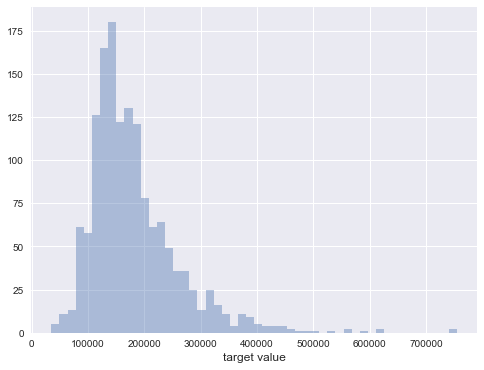

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
target = 'SalePrice'
plt.figure(figsize = (8,6))
tar_val = np.sort(df_train[target].values)
sns.distplot(tar_val,bins=50,kde=False)
plt.xlabel('target value',fontsize=12)

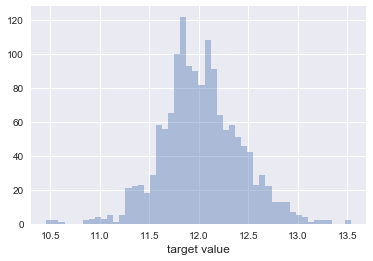

In [27]:
sns.distplot(np.log(tar_val),bins=50,kde=False)
plt.xlabel('target value',fontsize=12)

In [28]:
# OK 对label做了一个对数变换
df_train[target ] = np.log1p(df_train[target])

In [29]:
#对于数值型的数据，缺失值用均值填充
df_train[num_feats] = df_train[num_feats].fillna(df_train[num_feats].mean())
#train_data.dtypes，重新查找categorical features names
feat_data = df_train[df_train.columns[df_train.columns!='SalePrice']]
cate_feats = feat_data.dtypes[feat_data.dtypes==object].index

In [30]:
df_label = df_train[target]
df_train = df_train.drop(target,axis=1)
print(df_train.shape)
print(df_test.shape)

(1460, 76)
(1459, 76)


In [31]:
#连接 train 和 test data,并做归一化
all_df = pd.concat([df_train,df_test],axis=0)
all_df[num_feats] = all_df[num_feats].apply(lambda x:(x-x.mean())/(x.std()))

#处理缺失的cate_feats,先初步处理
# ...one hot encoding of categorical variables
for f in cate_feats:
    dummies = pd.get_dummies(all_df[f], prefix = f, prefix_sep = '_',dummy_na = True)
    all_df = pd.concat([all_df, dummies], axis = 1)
print(all_df.shape)

#删除 categorical features,因为已经转换成one-hot编码了
all_df = all_df.drop(cate_feats,axis=1)
all_df = all_df.fillna(all_df.mean())
print(all_df.shape)

(2919, 354)
(2919, 315)


In [32]:
train_data = all_df.iloc[0:df_train.shape[0],:]
test_data = all_df.iloc[df_train.shape[0]:,:]

In [33]:
train_data['label'] = df_label

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [34]:
train_data.to_csv('./input/processed_train_logged.csv',index = False)

In [35]:
test_data.to_csv('./input/processed_test_logged.csv',index= False)